In [89]:
#Import packages and libraries needed for PCA
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [90]:
#load data
medical = pd.read_csv('C:\Kim\WGU\D212 Data Mining 2\Data\medical_market_basket.csv')

In [91]:
#EDA
medical.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
medical.shape

(15002, 20)

In [93]:
#Data Preperation
medical_clean = medical[medical['Presc01'].notna()]
medical_clean.shape

(7501, 20)

In [94]:
#Create list of lists
records = []
for i in range(0, 7501):
    records.append([str(medical_clean.values[i,j]) for j in range(0, 20)])

In [95]:
TE = TransactionEncoder()
array = TE.fit(records).transform(records)
medical_df = pd.DataFrame(array, columns = TE.columns_)
medical_df.head(5)

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
medical_df.shape

(7501, 120)

In [97]:
for col in medical_df.columns:
    print(col)

Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [98]:
#remove blank columns
medical_clean = medical_df.drop(['nan'], axis = 1)
medical_clean.head(5)

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
#Export data
medical_clean.to_csv('C:\Kim\WGU\D212 Data Mining 2\Data\KFowler_D212_PA_Task3.csv')

In [100]:
count = medical_clean.loc[:,:].sum()
pop_item = count.sort_values(axis=0, ascending = False).head(5)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {'index': 'Medication',0: 'count'})

<function matplotlib.pyplot.show(close=None, block=None)>

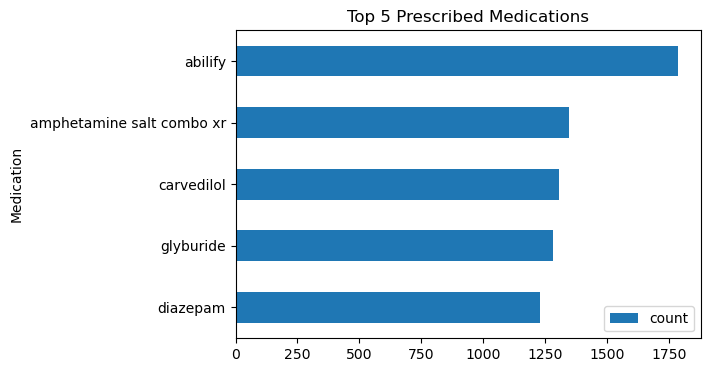

In [101]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
ax = pop_item.plot.barh(x = 'Medication', y = 'count')
plt.title('Top 5 Prescribed Medications')
plt.gca().invert_yaxis()
plt.show

In [102]:
apriori_rules = apriori(medical_clean, min_support = 0.02, use_colnames = True)
apriori_rules.head(5)

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.020397,(albuterol aerosol)
3,0.033329,(allopurinol)
4,0.079323,(alprazolam)


In [103]:
rules = association_rules(apriori_rules, metric='lift', min_threshold=1, num_itemsets=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,1.0,0.006564,1.137144,0.299568,0.082441,0.120604,0.214609
1,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,1.0,0.006564,1.030562,0.365218,0.082441,0.029655,0.214609
2,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,1.0,0.008095,1.183991,0.356144,0.086402,0.155399,0.229537
3,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,1.0,0.008095,1.037830,0.435627,0.086402,0.036451,0.229537
4,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,(metoprolol),(diazepam),0.095321,0.163845,0.022930,0.240559,1.468215,1.0,0.007312,1.101015,0.352502,0.097065,0.091747,0.190255
90,(glyburide),(doxycycline hyclate),0.170911,0.095054,0.020131,0.117785,1.239135,1.0,0.003885,1.025766,0.232768,0.081887,0.025118,0.164783
91,(doxycycline hyclate),(glyburide),0.095054,0.170911,0.020131,0.211781,1.239135,1.0,0.003885,1.051852,0.213256,0.081887,0.049296,0.164783
92,(losartan),(glyburide),0.132116,0.170911,0.028530,0.215943,1.263488,1.0,0.005950,1.057436,0.240286,0.103934,0.054316,0.191435


In [104]:
confidence_rules = rules.sort_values('confidence', ascending=False).head(3)
confidence_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
31,(metformin),(abilify),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
24,(glipizide),(abilify),0.065858,0.238368,0.027596,0.419028,1.757904,1.0,0.011898,1.310962,0.461536,0.099759,0.237201,0.267400
28,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127


In [59]:
lift_rules = rules.sort_values('lift', ascending=False).head(3)
lift_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
75,(carvedilol),(lisinopril),0.174110,0.098254,0.039195,0.225115,2.291162,1.0,0.022088,1.163716,0.682343,0.168096,0.140684,0.312015
74,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
72,(glipizide),(carvedilol),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939


In [60]:
support_rules = rules.sort_values('support', ascending=False).head(3) 
support_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
9,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
19,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
